In [19]:
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import r2_score
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [86]:
# df = pd.read_csv("/home/alireza/Documents/ml/dataset/carp/CrabAgePrediction.csv",low_memory=False)
df  = pd.read_csv("/home/alireza/Documents/ml/dataset/beluga/beluga.csv",low_memory=False)
deletated_data = """
    37,39.13,129.67
    38,43.98,115.03
    39,45.09,115.14
    40,24.01,55.1
    35,40.33,118.63
    36,43.18,112.41
    31,34.19,94.7
    """

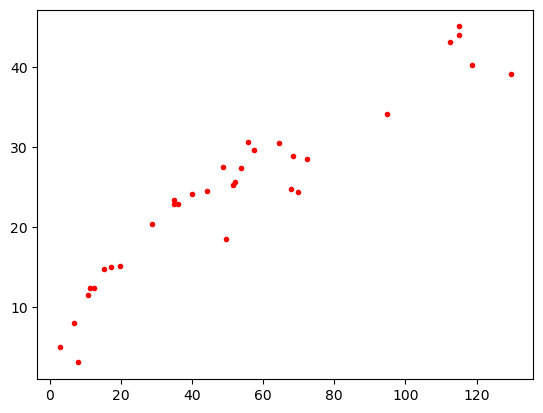

In [87]:

# plt.plot(df["Weight"],df["Length"],"b.")
plt.plot(df["Length"],df["Weight"],"r.")
plt.draw()

In [50]:
# for i, row in df.iterrows():
#         df.at[i,"Weight"] = df.at[i,"Weight"]*28.3495231
#         df.at[i,"Length"] = df.at[i,"Length"]*30.48
# df
# # 0.032808399 cm
# # 0.035274 g

In [88]:
new_samples = []
for i in range(len(df) - 1):
    for alpha in np.linspace(0.1, 0.9, num=10):  # Generate 5 new points between each pair
        new_age = (1 - alpha) * df['Age'].iloc[i] + alpha * df['Age'].iloc[i + 1]
        new_weight = (1 - alpha) * df['Weight'].iloc[i] + alpha * df['Weight'].iloc[i + 1]
        new_length = (1 - alpha) * df['Length'].iloc[i] + alpha * df['Length'].iloc[i + 1]
        new_samples.append([new_age, new_weight, new_length])

# Convert to DataFrame
new_samples_df = pd.DataFrame(new_samples, columns=['Age', 'Weight', 'Length'])
augmented_df = pd.concat([df, new_samples_df], ignore_index=True)

In [89]:
# plt.plot(augmented_df["Weight"],augmented_df["Length"],"b.")
# plt.plot(df["Weight"],df["Length"],"r.")
# plt.draw()

In [19]:
# plt.plot( length, age,"b.",)
# plt.draw()

In [47]:
# plt.plot( weight, age,"r.")
# plt.draw()

In [49]:
# mask = np.random.rand(len(belugas)) < 0.8
# training = belugas[mask]
# testing = belugas[~mask]

In [90]:
mask = np.random.rand(len(new_samples_df)) < 0.8
training = new_samples_df[mask]
testing = new_samples_df[~mask]


In [23]:
#  Old model

# linear_model
# reg = linear_model.LinearRegression()
# train_x = np.asanyarray(training[["Weight"]])
# train_y = np.asanyarray(training[["Length"]])
# reg.fit(train_x,train_y)
# print(reg.coef_)
# print(reg.intercept_)

In [1]:
# plt.scatter(training.Weight,training.Length, color="blue")
# plt.plot(train_x,reg.coef_[0]*train_x + reg.intercept_[0],'-r')

In [24]:
# Old model

# test_x = np.asanyarray(testing[["Weight"]])
# test_y = np.asanyarray(testing[["Length"]])
# test_predict = reg.predict(test_x)

# r2_score(test_y,test_predict)


In [26]:
# test_x = np.asanyarray(new_samples_df[["Age","Weight"]])
# test_y = np.asanyarray(new_samples_df[["Length"]])
# test_predict = reg.predict(test_x)

# r2_score(test_y,test_predict)


In [3]:
# sns.set(style="whitegrid")

# # Scatter Plot
# plt.figure(figsize=(12, 5))

# # Scatter plot for Weight vs Age
# plt.subplot(1, 2, 1)
# sns.scatterplot(x='Weight', y='Length', data=df)
# plt.title('Length vs Weight')
# plt.xlabel('Weight')
# plt.ylabel('Length')

# # Scatter plot for Length vs Age
# plt.subplot(1, 2, 2)
# sns.scatterplot(x='Age', y='Length', data=df)
# plt.title('Length vs Age')
# plt.xlabel('Age')
# plt.ylabel('Length')

# plt.tight_layout()
# plt.show()


In [91]:
X = df[['Age', 'Length']]  # Features
y = df['Weight']            # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
# mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(r2)
# print(f'Mean Squared Error: {mse:.2f}')
# print(f'R^2 Score: {r2:.2f}')

0.8793637901139175


In [ ]:
#### This is the part for PLOT

# # Create a grid for Age and Weight for plotting
# age_range = np.linspace(df['Age'].min(), df['Age'].max(), 100)
# weight_range = np.linspace(df['Weight'].min(), df['Weight'].max(), 100)
# age_grid, weight_grid = np.meshgrid(age_range, weight_range)

# # Prepare the grid for prediction
# grid_points = np.vstack([age_grid.ravel(), weight_grid.ravel()]).T
# grid_poly = poly.transform(grid_points)

# # Predict Length for the grid
# length_pred = model.predict(grid_poly)

# # Reshape the predicted values to match the grid
# length_grid = length_pred.reshape(age_grid.shape)

# # Create a 3D plot
# fig = plt.figure(figsize=(10, 8))
# ax = fig.add_subplot(111, projection='3d')

# # Plot the original training data
# scatter_train = ax.scatter(X_train['Age'], X_train['Weight'], y_train, color='b', marker='o', label='Training Data')

# # Plot the original test data
# scatter_test = ax.scatter(X_test['Age'], X_test['Weight'], y_test, color='g', marker='^', label='Test Data')

# # Plot the polynomial surface
# ax.plot_surface(age_grid, weight_grid, length_grid, color='r', alpha=0.5)

# # Set labels
# ax.set_xlabel('Age')
# ax.set_ylabel('Weight')
# ax.set_zlabel('Length')

# # Set title
# ax.set_title('3D Polynomial Fit of Length based on Age and Weight')

# # Create custom legend
# handles = [scatter_train, scatter_test]
# labels = ['Training Data', 'Test Data']
# ax.legend(handles, labels)

# # Show the plot
# plt.show()